In [1]:
# %% Global Variables
datasetPath = "./TM-3-2020"
sourceCodePath = './src'

In [ ]:
!pip install ipywidgets
!pip install sentence_transformers

In [13]:
# %% libraries
import numpy as np
import pandas as pd
import os
import sys
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib
import torch
import seaborn as sns

In [3]:
# %% Loads Source code
sys.path.append(os.path.join(os.getcwd(), sourceCodePath))

In [5]:
import chat as ch

In [6]:
dataset = ch.dataset.Dataset(datasetPath)

In [7]:
df = dataset.get_chat_lines_dataframe(100)

In [8]:
df.head()

,conversation_id,index,speaker,text
0,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,0.0,user,hi....am buying a ticket tonight so we go and ...
1,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,1.0,assistant,No problem. Is there a particular type of movi...
2,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,2.0,user,hhhmmmmm not at all. i dont have any in mind f...
3,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,3.0,assistant,Sure. I can help with that. Let me listings at...
4,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,4.0,user,sure you can but i want to see the movie at AM...


In [9]:
chat_classifier = ch.dataset.ChatLinesClassifier(
    components_n=2,
    class_number=60,
    device='cpu',
    svd_solver='full',
    model_name='all-MiniLM-L6-v2')

In [10]:
df, ìtems, pca_items, kmeans = chat_classifier.fit(df, random_state=42, verbose=True)

[0.10518312 0.07158624]
[12.559196 10.361047]


In [11]:
df.head(40)

,conversation_id,index,speaker,text,line_intent
0,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,0.0,user,hi....am buying a ticket tonight so we go and ...,10
1,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,1.0,assistant,No problem. Is there a particular type of movi...,6
2,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,2.0,user,hhhmmmmm not at all. i dont have any in mind f...,47
3,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,3.0,assistant,Sure. I can help with that. Let me listings at...,14
4,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,4.0,user,sure you can but i want to see the movie at AM...,14
5,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,5.0,assistant,"Oh, sorry about that. So you’re interested in ...",29
6,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,6.0,user,yeah,57
7,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,7.0,assistant,OK. I show one action movie playing at AMC Mou...,21
8,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,8.0,user,yeah but 9.10pm will be perfect for me,7
9,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,9.0,assistant,Great. And how many tickets?,11


<AxesSubplot: >

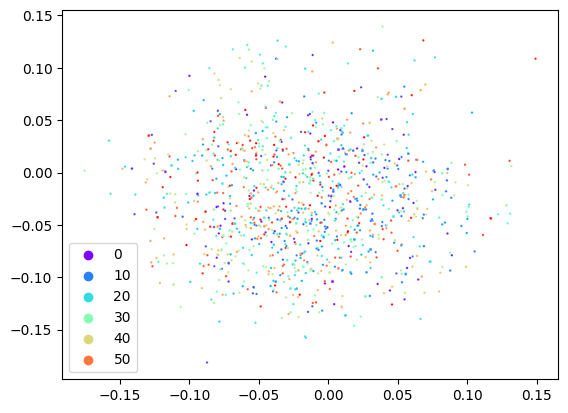

In [14]:
sns.scatterplot(x = ìtems[:,0], y = ìtems[:,1], hue=kmeans.labels_,palette="rainbow", s=3)

<AxesSubplot: >

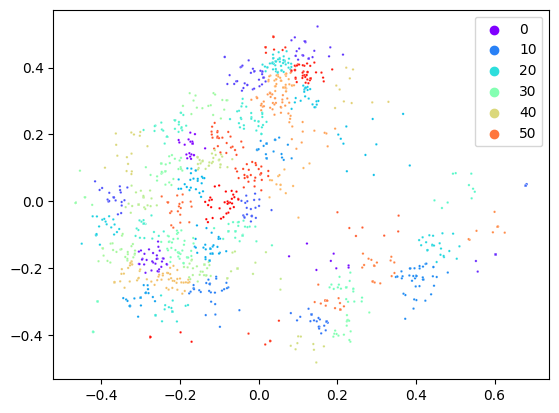

In [16]:
sns.scatterplot(x = pca_items[:,0], y = pca_items[:,1], hue=kmeans.labels_,palette="rainbow", s=3)